In [623]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split , cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)


## Creating dataframe

In [624]:
# Importing datasets
star = pd.read_csv("star_classification.csv")
star

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.237679e+18,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,301,2,581,1.055431e+19,GALAXY,0.000000,9374,57749,438
99996,1.237679e+18,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,301,1,289,8.586351e+18,GALAXY,0.404895,7626,56934,866
99997,1.237668e+18,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,301,4,308,3.112008e+18,GALAXY,0.143366,2764,54535,74
99998,1.237661e+18,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,301,4,131,7.601080e+18,GALAXY,0.455040,6751,56368,470


In [625]:
# A rough overview of data
star.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [626]:
# Checking if any values are null
star.isnull(). sum()

obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64

In [627]:
star.dtypes

obj_ID         float64
alpha          float64
delta          float64
u              float64
g              float64
r              float64
i              float64
z              float64
run_ID           int64
rerun_ID         int64
cam_col          int64
field_ID         int64
spec_obj_ID    float64
class           object
redshift       float64
plate            int64
MJD              int64
fiber_ID         int64
dtype: object

In [628]:
star.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


In [629]:
star['class'].nunique()

3

In [630]:
star['class'].unique()

array(['GALAXY', 'QSO', 'STAR'], dtype=object)

In [631]:
star["class"].value_counts()

class
GALAXY    59445
STAR      21594
QSO       18961
Name: count, dtype: int64

In [632]:
a, b, c = star["class"].value_counts() / len(star)
print(f"Total percentage of Galaxies : {round(a*100, 1)}%")
print(f"Total percentage of Stars : {round(b*100, 1)}%")
print(f"Total percentage of QSO : {round(c*100, 1)}%")

Total percentage of Galaxies : 59.4%
Total percentage of Stars : 21.6%
Total percentage of QSO : 19.0%


## Data Visualization

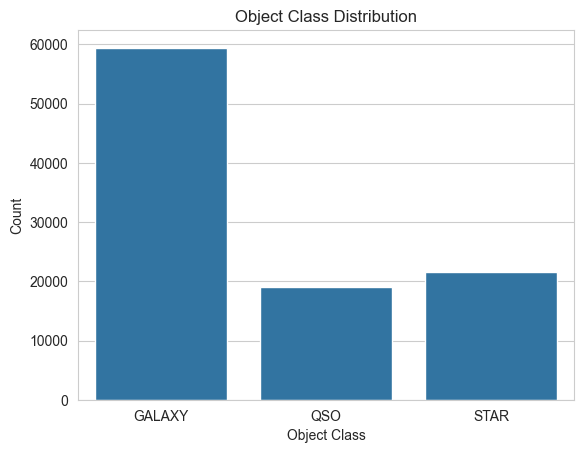

In [633]:
# Visualizing object class distribution
sns.countplot(x='class', data=star)
plt.xlabel('Object Class')
plt.ylabel('Count')
plt.title('Object Class Distribution')
plt.show()

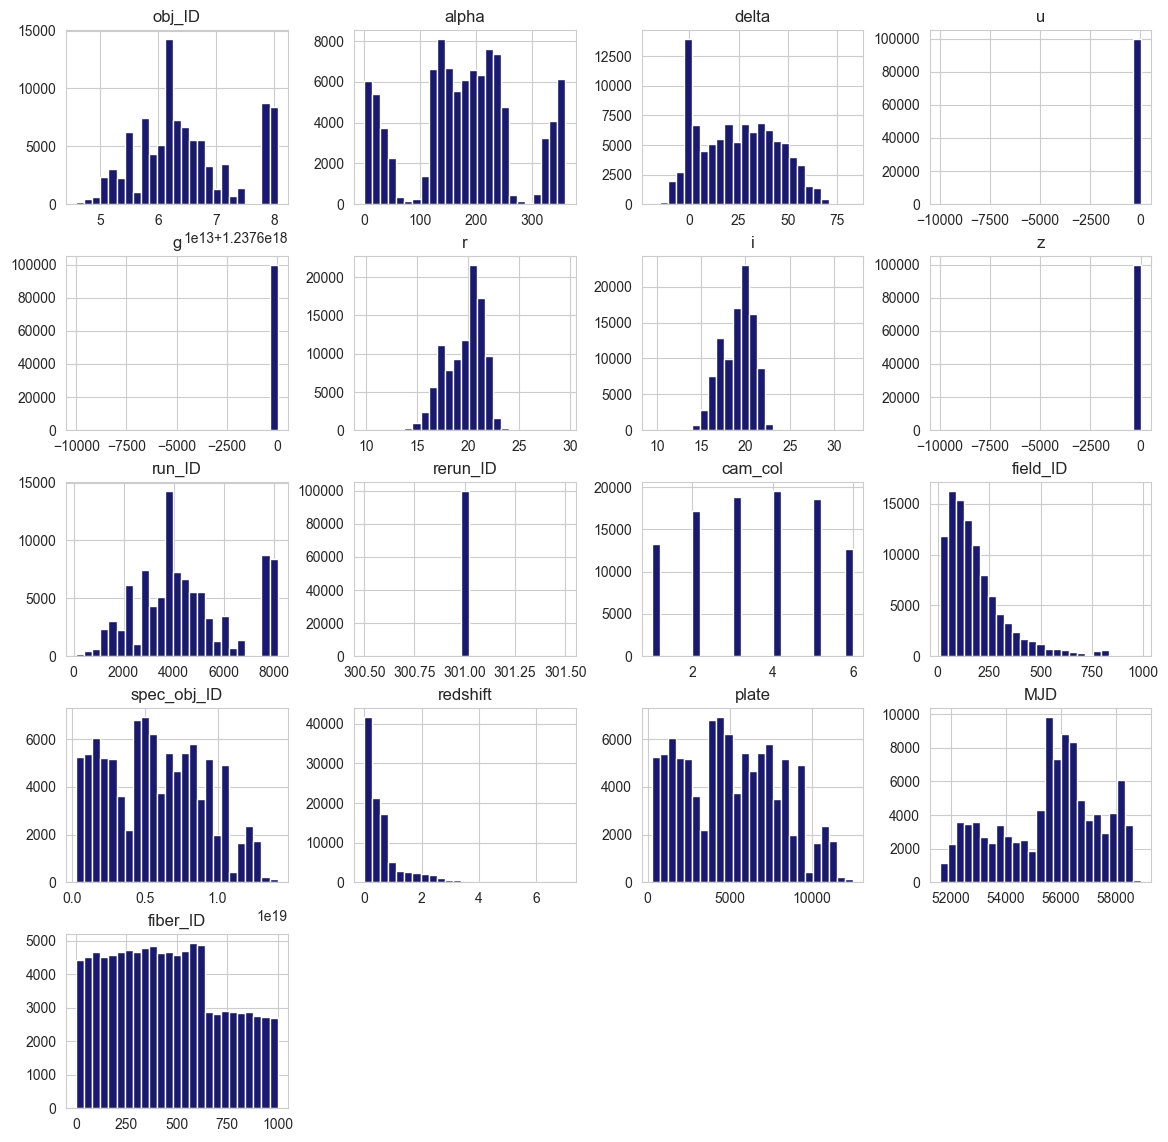

In [634]:
star.hist(bins =25 , figsize= (14,14), color="midnightblue")
plt.show()

## Feature Selection

In [635]:
X = star[['u', 'g', 'r', 'i', 'z', 'redshift', 'plate']]
X

,u,g,r,i,z,redshift,plate
0,23.87882,22.27530,20.39501,19.16573,18.79371,0.634794,5812
1,24.77759,22.83188,22.58444,21.16812,21.61427,0.779136,10445
2,25.26307,22.66389,20.60976,19.34857,18.94827,0.644195,4576
3,22.13682,23.77656,21.61162,20.50454,19.25010,0.932346,9149
4,19.43718,17.58028,16.49747,15.97711,15.54461,0.116123,6121
...,...,...,...,...,...,...,...
99995,22.16759,22.97586,21.90404,21.30548,20.73569,0.000000,9374
99996,22.69118,22.38628,20.45003,19.75759,19.41526,0.404895,7626
99997,21.16916,19.26997,18.20428,17.69034,17.35221,0.143366,2764
99998,25.35039,21.63757,19.91386,19.07254,18.62482,0.455040,6751


In [636]:
y = star['class']
y

0        GALAXY
1        GALAXY
2        GALAXY
3        GALAXY
4        GALAXY
          ...  
99995    GALAXY
99996    GALAXY
99997    GALAXY
99998    GALAXY
99999    GALAXY
Name: class, Length: 100000, dtype: object

## Resampling

In [637]:
#from imblearn.over_sampling import SMOTE
#sm = SMOTE(random_state = 30, k_neighbors = 10)
#X_res, y_res = sm.fit_resample(X, y)

In [638]:
#y.value_counts()

In [639]:
#y_res.value_counts()

## Splitting Dataset

In [640]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle= True, random_state = 42)

In [641]:
len(X_train)

75000

In [642]:
len(X_test)

25000

In [643]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [644]:
knn.score(X_test, y_test)

0.85952

k=3: Accuracy = 0.86
k=7: Accuracy = 0.85
k=13: Accuracy = 0.82
k=15: Accuracy = 0.82


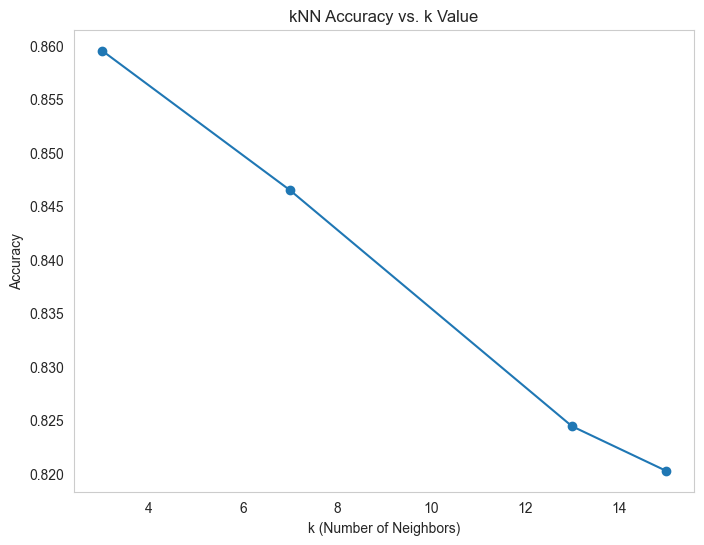

In [645]:
# Experiment with different values of k
from sklearn.metrics import accuracy_score
k_values = [3, 7, 13, 15]
accuracies = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f"k={k}: Accuracy = {accuracy:.2f}")

# Visualise the results
plt.figure(figsize=(8, 6))
plt.plot(k_values, accuracies, marker='o')
plt.title('kNN Accuracy vs. k Value')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

k=2: Accuracy = 0.85
k=5: Accuracy = 0.85
k=9: Accuracy = 0.84
k=11: Accuracy = 0.83


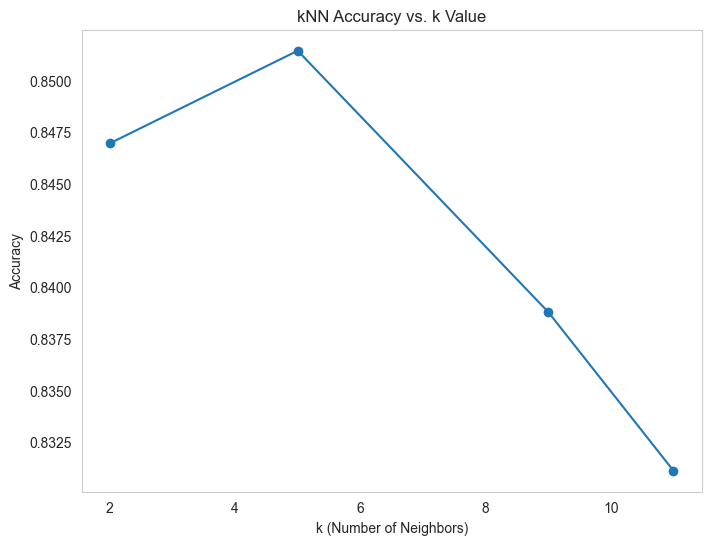

In [646]:
# Experiment with different values of k
from sklearn.metrics import accuracy_score
k_values = [2, 5, 9, 11]
accuracies = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f"k={k}: Accuracy = {accuracy:.2f}")

# Visualise the results
plt.figure(figsize=(8, 6))
plt.plot(k_values, accuracies, marker='o')
plt.title('kNN Accuracy vs. k Value')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

test_size=0.4: Accuracy = 0.84
test_size=0.3: Accuracy = 0.85
test_size=0.2: Accuracy = 0.86
test_size=0.1: Accuracy = 0.87


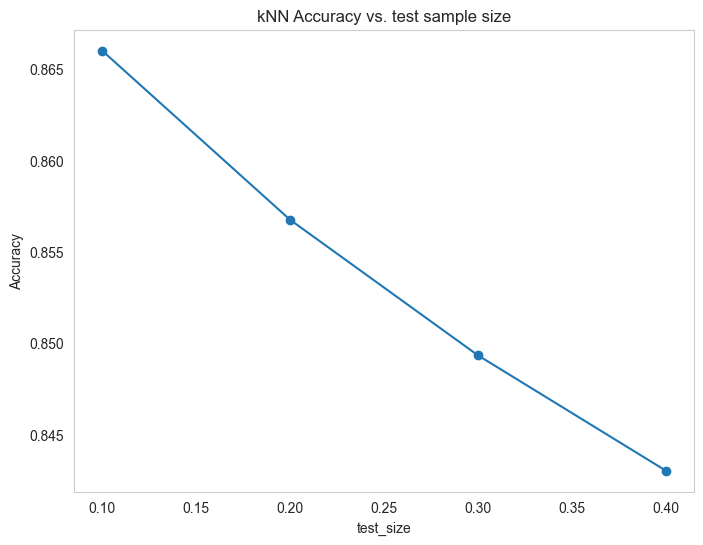

In [647]:
# Experiment with different values of training/testing split portions
from sklearn.metrics import accuracy_score
test_sizes = [0.4, 0.3, 0.2, 0.1]
accuracies = []
for size in test_sizes:
    knn = KNeighborsClassifier(n_neighbors=5)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=size, random_state = 30)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f"test_size={size}: Accuracy = {accuracy:.2f}")

# Visualise the results
plt.figure(figsize=(8, 6))
plt.plot(test_sizes, accuracies, marker='o')
plt.title('kNN Accuracy vs. test sample size')
plt.xlabel('test_size')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

Score: 0.82975
Score: 0.8448
Score: 0.8448
Score: 0.8316
Score: 0.83895


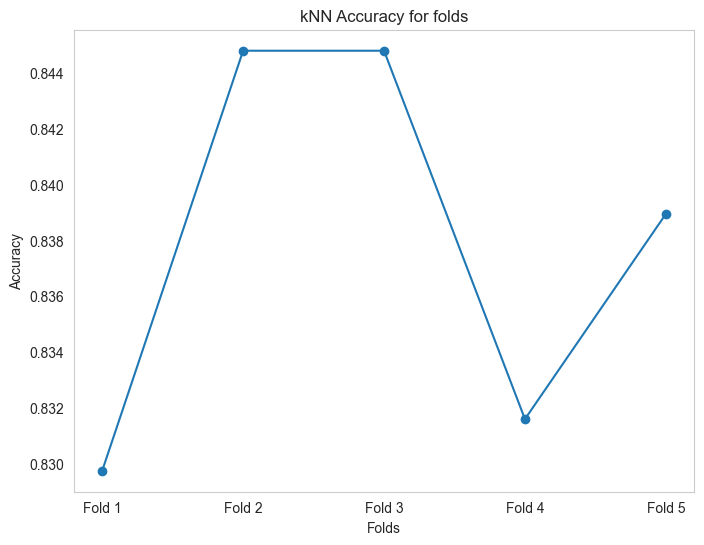

In [648]:
scores = cross_val_score(knn, X, y, cv=5)
folds = ["Fold 1", "Fold 2","Fold 3","Fold 4","Fold 5",]
for score in scores:
    print("Score:", score)

plt.figure(figsize=(8, 6))
plt.plot(folds, scores, marker='o')
plt.title('kNN Accuracy for folds')
plt.xlabel('Folds')
plt.ylabel('Accuracy')
plt.grid()
plt.show()